Kmeans

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('BlueMosque.csv',nrows = 35000,delimiter=';', skiprows=0, low_memory=False)
data = df['Comment']

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [3]:
class Kmeans:    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter               
    
    def initialise_centroids(self, data):
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]
        return self.centroids
    
    def assign_clusters(self, data):       
        if data.ndim == 1:
            data = data.reshape(-1, 1)      
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1) 
        return  self.cluster_labels  
    
    def update_centroids(self, data):       
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])       
        return self.centroids   
    
    def predict(self, data):      
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        self.centroids = self.initialise_centroids(data)   
        for iter in range(self.max_iter):
            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self   

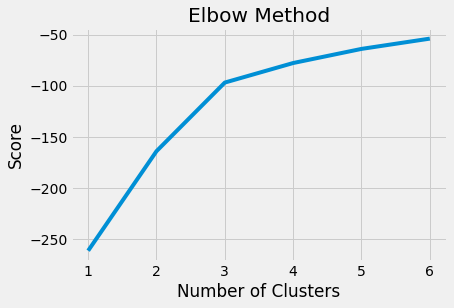

In [4]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


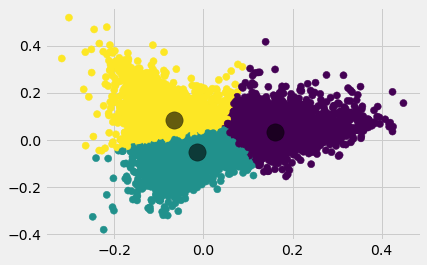

In [5]:
test_e = Kmeans(3, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [6]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [7]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) 
        x_means = np.mean(tf_idf_array[id_temp], axis = 0)
        sorted_means = np.argsort(x_means)[::-1][:n_feats] 
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 10)
dfs

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[  features     score
 0    cover  0.079376
 1    women  0.062381
 2     head  0.062132
 3    shoes  0.060468
 4     wear  0.052147
 5    scarf  0.050076
 6   mosque  0.048191
 7     need  0.040035
 8     long  0.034523
 9     free  0.034479,
     features     score
 0     mosque  0.116860
 1       blue  0.098158
 2   istanbul  0.049210
 3  beautiful  0.045980
 4     inside  0.039589
 5      visit  0.034661
 6      tiles  0.031461
 7      hagia  0.025272
 8     sophia  0.023809
 9    outside  0.022586,
        features     score
 0         place  0.041830
 1         visit  0.036978
 2        mosque  0.033361
 3     beautiful  0.032575
 4        inside  0.025970
 5      istanbul  0.025081
 6       amazing  0.024214
 7          time  0.023779
 8  architecture  0.021979
 9      building  0.019628]

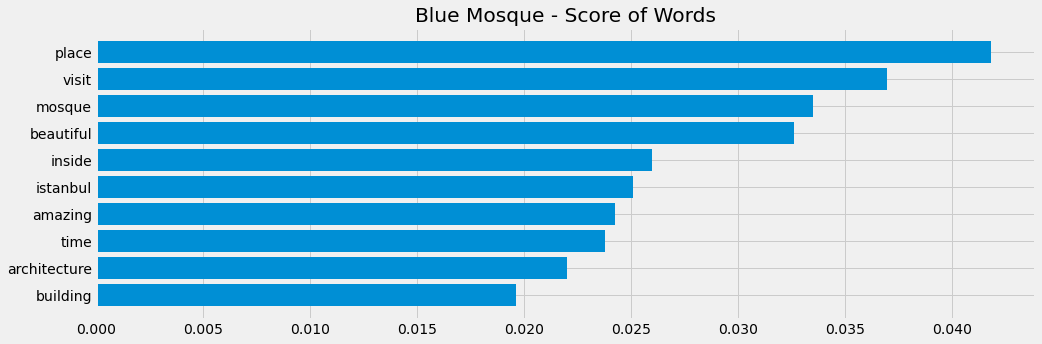

In [8]:
plt.figure(figsize=(15, 5)) 
x = ["place", "visit", "mosque", "beautiful", "inside", "istanbul", "amazing", "time", "architecture", "building"]
y = [0.041787,0.036934,0.033478,0.032606,0.025985,0.025091,0.024232,0.023783,0.022003,0.019611]
x = x[::-1]
y = y[::-1]
plt.barh(x,y)
plt.title('Blue Mosque - Score of Words')
plt.show()